<a href="https://colab.research.google.com/github/Buchiexplores/Notebooks/blob/master/ML_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**MY NOTEBOOK ON PROTOTYPING MACHINE LEARNING CLASSIFICATION MODELS**
Compiled by **Abuchi Godswill Okeke**

Linkedin: https://www.linkedin.com/in/abuchi-okeke-67b48a105/

e-mail: okekeag@gmail.com

#Features:
* Upload files from google drive or local device drive
* Dimensional reduction and feature selection using PCA
* Cross-Validation to find best estimators
* Random forest classifier
* K nearest neighbor classifier
* Support vector classifier
* Ensemble learning
* Model evaluation






In [0]:

#Importing Libraries

#Scikit-learn (machine learning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline
plt.style.use('ggplot')

#Other libraries
from google.colab import files
import io
import numpy as np
import pandas as pd

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'add your file ID here'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('filename.csv')

In [0]:
#upload from your local device drive
uploaded = files.upload()


In [0]:
#label_df = pd.read_csv(io.BytesIO(uploaded['Yclassification_label.csv']))
# Dataset is n#ow stored in a Pandas Dataframe

In [0]:
#set base directory here
base_dir = '/content/';

In [45]:
X_data = np.loadtxt(base_dir + 'bread_samples_classification.csv', delimiter=',');
y_data = np.loadtxt(base_dir + 'bread_classification_label.csv');
X_data.shape
y_data.shape

(400,)

In [46]:
wavenumbers = np.loadtxt(base_dir + 'bread_wavenumbers.csv', delimiter=',');
wavenumbers.shape


(7468, 210)

Text(0, 0.5, 'ylabel_name')

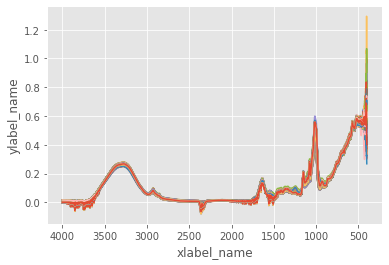

In [47]:
#Visualize data
plt.figure()
plt.gca().invert_xaxis()
plt.plot(np.transpose(wavenumbers)[1],X_data, '-')
plt.xlabel('xlabel_name');
plt.ylabel('ylabel_name')

#**Principal component analysis (PCA)** 
PCA is a technique for feature extraction that uses orthogonal transformation to extract import features from the input
variables — so it can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. source: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [0]:
#PCA Dimensional Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [0]:
# Standardize the feature matrix
data_rescaled = StandardScaler().fit_transform(np.transpose(X_data))
# scaler = MinMaxScaler(feature_range=[0, 1])
# data_rescaled = scaler.fit_transform(X_train)

In [0]:
pca = PCA().fit(data_rescaled)

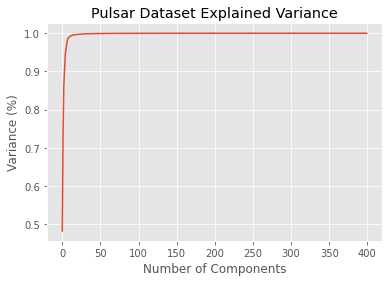

In [56]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
# Create a PCA that will retain the % variance needed (choose n_components from the plot above)
pca = PCA(n_components=20, whiten=True)

#Conduct PCA
data_pca = pca.fit_transform(data_rescaled)
#wavenumbers_pca = pca.fit_transform(np.transpose(wavenumbers))

In [58]:
#Show results
print('Original number of features:', data_rescaled.shape[1])
print('Reduced number of features:', data_pca.shape[1])

Original number of features: 7468
Reduced number of features: 20


#**Data Splitting**#

In [59]:
#Split data from PCA into train and test samples
train_sample, test_sample, train_label, test_label = train_test_split(data_pca, y_data, random_state = 42, test_size=0.3)
print(train_sample.shape)
print(test_sample.shape)
print(train_label.shape)
print(test_label.shape)


(280, 20)
(120, 20)
(280,)
(120,)


In [0]:
#If you're not using PCA split the original dataset here 80% : 20%
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.2)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


#**RandonForestClassifier**
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. Source: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

Uncomment below to run cross-validation and find the best number of estimators for your classifier. You can switch between classifiers of your choice and tune other hyper-parameters.

In [0]:
# #Cross-validation for RandomForestClassifier
# #find the best n_estimators

# estimators = list(range(900, 3000, 100))
# # # empty list that will hold cv scores
# cv_scores = []
# # perform 10-fold cross validation
# for k in estimators:
#     Rdf = RandomForestClassifier(n_estimators=k, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)
#     scores = cross_val_score(Rdf, train_sample, train_label, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())

In [0]:
## Plot the CV-results to show misclassification errors
# mse = [1 - x for x in cv_scores]

# # determining best k
# optimal_k = estimators[mse.index(min(mse))]
# print("The optimal number of estimators is {}".format(optimal_k))

# # plot misclassification error vs k
# plt.plot(estimators, mse)
# plt.xlabel("Number of Estimators K")
# plt.ylabel("Misclassification Error")
# plt.show()

In [61]:
#Build your RandomForestClassifier models with the best number estimators and other tunned parameters
clf = RandomForestClassifier(n_estimators= 50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=2000, verbose=0, warm_start=False, class_weight=None)
clf.fit(train_sample, train_label)

predsRf = clf.predict(test_sample)
# print("Accuracy:", accuracy_score(ytest,preds))
#print(clf.score(X_train, y_train))
print("accuracy: {}".format(accuracy_score(test_label, predsRf)))



accuracy: 1.0


#**K-Nearest Neighbor(KNN) Classification**
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1. Read more (Credit): https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

In [62]:
#Build your KNeighborsClassifier models with the best number estimators and other tunned parameters from CV
#Distances: euclidean, manhattan, hamming, minkowski

knn = KNeighborsClassifier(n_neighbors=6, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='manhattan', metric_params=None, n_jobs=-1)
knn.fit(train_sample, train_label)
predsKNN = knn.predict(test_sample)
# df = pd.DataFrame(clf.predict(X_test), columns=['Label'])
# df.index += 1 # "upgrade" to one-based indexing
# df.to_csv('Abuchi_knn_submission.csv',index_label='ID',columns=['Label'])
# clf.score(X_train,y_train)
print("accuracy: {}".format(accuracy_score(test_label, predsKNN)))

accuracy: 0.9666666666666667


In [0]:
# from sklearn.tree import DecisionTreeClassifier

# dct = DecisionTreeClassifier(criterion='gini', max_features='auto', splitter='best', max_depth=1000, min_samples_split=2)
# dct.fit(train_sample,train_label)
# predsTree = dct.predict(test_sample)
# print("accuracy: {}".format(accuracy_score(test_label, predsTree)))

#**Support Vector Machine (SVM)**

SVM is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. Read more (Credit): https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [63]:
#Build your SVClassifier models with the best tunned parameters from CV
svc = SVC(C=2.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.1,random_state=None, decision_function_shape='ovo')
svc.fit(train_sample,train_label)
predsSVC = svc.predict(test_sample)
print("accuracy: {}".format(accuracy_score(test_label, predsSVC)))

accuracy: 1.0


#**Ensemble Learning**
This produces one optimal classifier or predictive model by combining different base models together. Read more (Credit): https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

**Method Used**: Max voting method

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

credit: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/


In [64]:
#Ensemble your classifiers

model1 = clf
model2 = knn
model3 = svc
model = VotingClassifier(estimators=[('rf', model1), ('kn', model2), ('sc', model3)], voting='hard')
model.fit(train_sample,train_label)
model.score(test_sample,test_label)

preds_training = model.predict(train_sample)
preds = model.predict(test_sample)

print("accuracy: {}".format(accuracy_score(train_label, preds_training)))
print("accuracy: {}".format(accuracy_score(test_label, preds)))

accuracy: 1.0
accuracy: 1.0


#**Model Evaluation**

Model evaluation defines how well a model tends to perform on future (unseen/out-of-sample) data.

Read more:
https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b

In [66]:
#Non-normalized confusion matrix for training
cm_train = confusion_matrix(train_label, preds_training)
# print(cm)
classes = ["class 1","class 2"]
pd.DataFrame(cm_train, classes, classes)

,class 1,class 2
class 1,138,0
class 2,0,142


In [67]:
#Non-normalized confusion matrix
cm_test = confusion_matrix(test_label, preds)
# print(cm)
classes = ["class 1","class 2"]
pd.DataFrame(cm_test, classes, classes)

,class 1,class 2
class 1,62,0
class 2,0,58


In [0]:
#Normalized confusion matrix
import seaborn as sns
def norm_cm (cm):
  cmn = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  fig,ax = plt.subplots(figsize=(12,12))
  sns_plot=sns.heatmap(cmn,annot=True,fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)
  fig = sns_plot.get_figure()
  fig.savefig("output.png")

In [0]:
#Visualized Normalized Confusion Matrix for Train Tata
norm_cm(cm_train)

In [0]:
#Visualized Normalized Confusion Matrix for Test Data
norm_cm(cm_test)


In [0]:
#Calculate evaluation parameters
def eval_cm_parameters(cm):
  np.seterr(divide='ignore', invalid='ignore')
  FP = cm.sum(axis=0) - np.diag(cm)  
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  metric_list = ["FP", "TP", "FN","TN", "TPR", "TNR", "PPV", "NPV", "FPR", "FNR", "FDR", "ACC"]
  metric_data = [FP, TP, FN, TN, TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC]
  classes = ["class 1","class 2"]
  #pd.DataFrame(metric_data, metric_list, classes)
  return metric_data, metric_list, classes


In [83]:
#Calculate confusion matrix parameters for train data
metric_data, metric_list, classes = eval_cm_parameters(cm_train)
pd.DataFrame(metric_data, metric_list, classes)

,class 1,class 2
FP,0.0,0.0
TP,138.0,142.0
FN,0.0,0.0
TN,142.0,138.0
TPR,1.0,1.0
TNR,1.0,1.0
PPV,1.0,1.0
NPV,1.0,1.0
FPR,0.0,0.0
FNR,0.0,0.0


In [84]:
#Calculate confusion matrix parameters for test data
metric_data, metric_list, classes = eval_cm_parameters(cm_test)
pd.DataFrame(metric_data, metric_list, classes)

,class 1,class 2
FP,0.0,0.0
TP,62.0,58.0
FN,0.0,0.0
TN,58.0,62.0
TPR,1.0,1.0
TNR,1.0,1.0
PPV,1.0,1.0
NPV,1.0,1.0
FPR,0.0,0.0
FNR,0.0,0.0


In [0]:
#More on evaluation
from sklearn.metrics import precision_recall_fscore_support as score

def eval_cm (label, preds):
  precision, recall, fscore, support = score(label, preds)
  data_score = [precision, recall, fscore, support]
  scores_heading = ["precision", "recall", "fscore", "support"]
  classes = ["CF(100%)", "CF + WF"]
  return data_score, scores_heading , classes

In [90]:
#More on evaluation for train
data_score, scores_heading , classes = eval_cm (train_label, preds_training)
pd.DataFrame(data_score, scores_heading , classes)


,CF(100%),CF + WF
precision,1.0,1.0
recall,1.0,1.0
fscore,1.0,1.0
support,138.0,142.0


In [88]:
#More on evaluation for test
data_score, scores_heading , classes = eval_cm (test_label, preds)
pd.DataFrame(data_score, scores_heading , classes)


,CF(100%),CF + WF
precision,1.0,1.0
recall,1.0,1.0
fscore,1.0,1.0
support,62.0,58.0


**End of notebook**

Please kindly reach out to me for contributions, addition or any other information.

Sincerely,

Abuchi